In [114]:
# Importing the required libraries
from cuqi.distribution import Gaussian
from cuqi.problem import BayesianProblem
from cuqi.model import LinearModel
import numpy as np
import matplotlib.pyplot as plt

In [115]:
A = np.array([[1.0, 1.0]])
#could be a CUQIpy array  

In [116]:
A.shape

(1, 2)

In [117]:
S = LinearModel(A)

In [118]:
print(S)

CUQI LinearModel: _DefaultGeometry1D(2,) -> _DefaultGeometry1D(1,).
    Forward parameters: ['x'].


# LINEAR MODEL

it has the following attributes: range geometry and dimension, domain geometry and dimension 
corresponds to the dimensions of the np_array 

In [119]:
S.range_geometry

_DefaultGeometry1D(1,)

In [120]:
S.range_dim

1

In [121]:
S.domain_dim

2

In [122]:
S.domain_geometry

_DefaultGeometry1D(2,)

In [123]:
S.T

CUQI LinearModel: _DefaultGeometry1D(1,) -> _DefaultGeometry1D(2,).
    Forward parameters: ['y'].

In [124]:
S.get_matrix()

array([[1., 1.]])

In [125]:
type(S.get_matrix())

numpy.ndarray

In [126]:
A@([0.1, 0.1])

array([0.2])

In [127]:
S@([0.1, 0.1])

array([0.2])

In [128]:
B_matrix = np.array([[1, 0, 0],[0,1,0], [0,0,1]])

In [129]:
B= LinearModel(B_matrix)

In [130]:
B@[1,2,3]

array([1, 2, 3])

In [131]:
print(S)

CUQI LinearModel: _DefaultGeometry1D(2,) -> _DefaultGeometry1D(1,).
    Forward parameters: ['x'].


In [132]:
print(B)

CUQI LinearModel: _DefaultGeometry1D(3,) -> _DefaultGeometry1D(3,).
    Forward parameters: ['x'].


In [133]:
x = Gaussian(np.zeros(2), 2.5) #gaussian cuqipy distribution function first is mean second is covariance 

In [134]:
def plot2d(val, x1_min, x1_max, x2_min, x2_max, N2=201):
    # plot
    pixelwidth_x = (x1_max-x1_min)/(N2-1)
    pixelwidth_y = (x2_max-x2_min)/(N2-1)

    hp_x = 0.5*pixelwidth_x
    hp_y = 0.5*pixelwidth_y

    extent = (x1_min-hp_x, x1_max+hp_x, x2_min-hp_y, x2_max+hp_y)

    plt.imshow(val, origin='lower', extent=extent)
    plt.colorbar()


def plot_pdf_2D(distb, x1_min, x1_max, x2_min, x2_max, N2=201):
    N2 = 201
    ls1 = np.linspace(x1_min, x1_max, N2)
    ls2 = np.linspace(x2_min, x2_max, N2)
    grid1, grid2 = np.meshgrid(ls1, ls2)
    distb_pdf = np.zeros((N2,N2))
    for ii in range(N2):
        for jj in range(N2):
            distb_pdf[ii,jj] = np.exp(distb.logd([grid1[ii,jj], grid2[ii,jj]])) 
    plot2d(distb_pdf, x1_min, x1_max, x2_min, x2_max, N2)

C:\Users\Ich\AppData\Local\Temp\ipykernel_1968\1366380294.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distb_pdf[ii,jj] = np.exp(distb.logd([grid1[ii,jj], grid2[ii,jj]]))


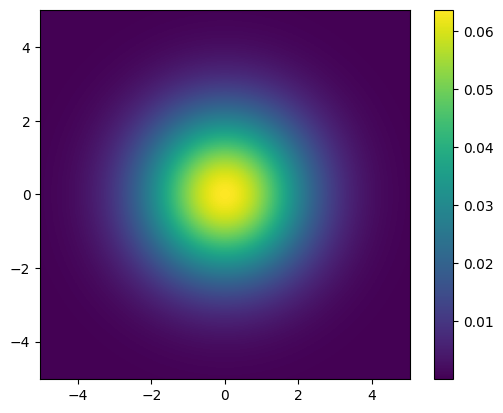

In [135]:
plot_pdf_2D(x, x1_min=-5, x1_max=5, x2_min=-5, x2_max=5)

In [136]:
x_samples= x.sample(1000)

In [137]:
x_samples
# why cant we see a specific sample 

<Axes: xlabel='v0', ylabel='v1'>

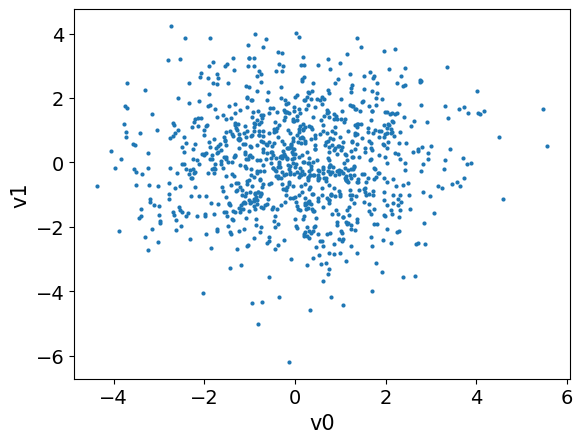

In [138]:
x_samples.plot_pair()


C:\Users\Ich\AppData\Local\Temp\ipykernel_1968\1366380294.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distb_pdf[ii,jj] = np.exp(distb.logd([grid1[ii,jj], grid2[ii,jj]]))


<Axes: xlabel='v0', ylabel='v1'>

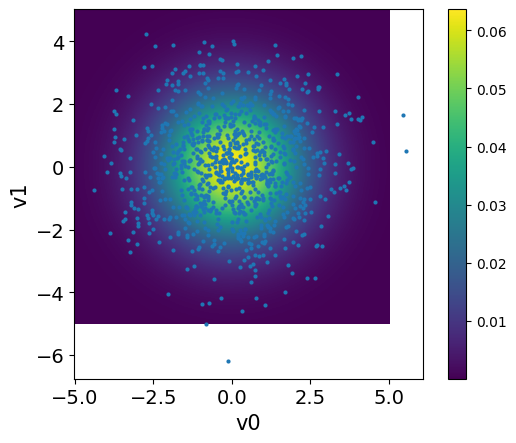

In [139]:
fig, ax = plt.subplots()

# Plot the 2D PDF
plot_pdf_2D(x, x1_min=-5, x1_max=5, x2_min=-5, x2_max=5)

# Plot the pair plot on the same axis
x_samples.plot_pair(ax=ax)


In [140]:
x_exercise= Gaussian(mean = np.zeros(2), cov = np.array([[1.0, 0.7], [0.7, 4.0]]))
x_exercise

CUQI Gaussian.

C:\Users\Ich\AppData\Local\Temp\ipykernel_1968\1366380294.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distb_pdf[ii,jj] = np.exp(distb.logd([grid1[ii,jj], grid2[ii,jj]]))


<Axes: xlabel='v0', ylabel='v1'>

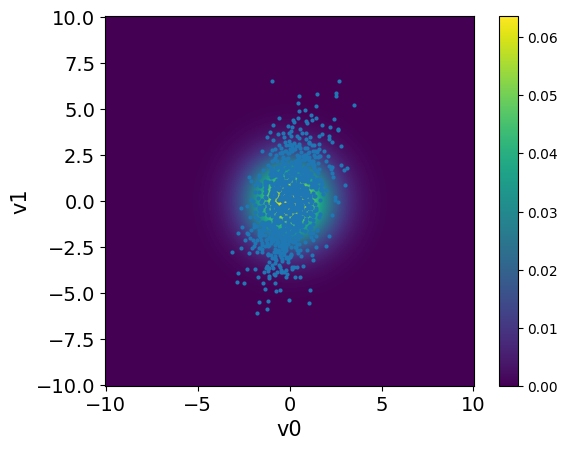

In [141]:
fig, ax = plt.subplots()

# Plot the 2D PDF
plot_pdf_2D(x, x1_min=-10, x1_max=10, x2_min=-10, x2_max=10)

# Plot the pair plot on the same axis
x_exercise.sample(1000).plot_pair(ax=ax)


In [142]:
e = Gaussian(0, 0.1)

In [143]:
e

CUQI Gaussian.

In [144]:
e.sample(1000)

array([[<Axes: title={'center': 'v'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

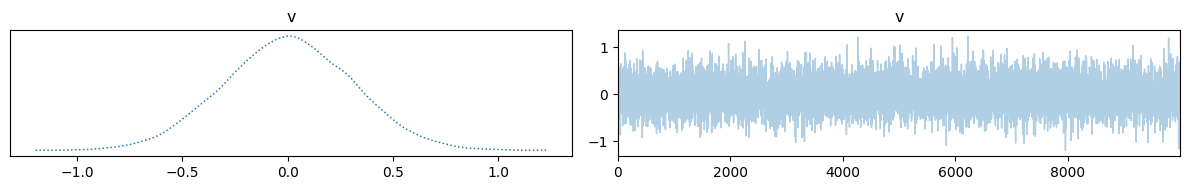

In [145]:
e.sample(10000).plot_trace()

In [146]:
def plot_pdf_1D(distb, min, max):
    grid = np.linspace(min, max, 1000)
    y = [distb.pdf(grid_point) for grid_point in grid]
    plt.plot(grid, y)

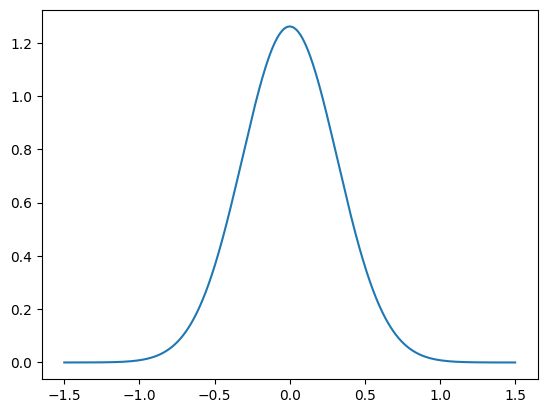

In [148]:
plot_pdf_1D(e, -1.5, 1.5)

In [149]:
e_exercise = Gaussian(0, 0.5)

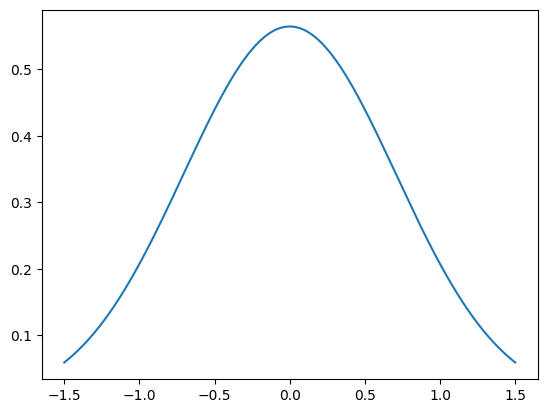

In [150]:
plot_pdf_1D(e_exercise, -1.5, 1.5)

In [152]:
b = Gaussian(S@x, 0.1)
#what is the difference between S and S@x

In [155]:
S

CUQI LinearModel: _DefaultGeometry1D(2,) -> _DefaultGeometry1D(1,).
    Forward parameters: ['x'].

In [156]:
S@x

CUQI LinearModel: _DefaultGeometry1D(2,) -> _DefaultGeometry1D(1,).
    Forward parameters: ['x'].

In [157]:
b

CUQI Gaussian. Conditioning variables ['x'].

In [159]:
# Here we catch the error and print it
try:
    b.sample(10)
except Exception as e:
    print(e)

Cannot sample from conditional distribution. Missing conditioning variables: ['x']


In [169]:
specific =  np.array([1.5,1.5 ])

In [172]:
b(x = specific).sample()

CUQIarray: NumPy array wrapped with geometry.
---------------------------------------------

Geometry:
 _DefaultGeometry1D(1,)

Parameters:
 True

Array:
CUQIarray(2.91548943)

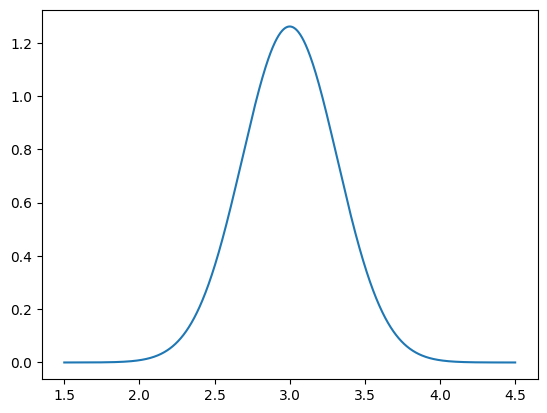

In [174]:
plot_pdf_1D(b(x = specific), 1.5, 4.5)

In [221]:
bb= b(x = specific).sample(1000)
type(bb)    

cuqi.samples._samples.Samples

In [239]:
b(x = specific)
(bb.samples - A@specific)

array([[-3.84164861e-01, -4.00335988e-01,  2.13896646e-01,
        -8.30750407e-01,  4.63031976e-01,  2.60443957e-02,
        -1.57619427e-01,  2.49874028e-01, -4.61628274e-01,
         3.92717983e-01,  3.16745844e-01, -4.64928518e-01,
        -3.58010991e-01, -2.32385744e-02, -1.20521308e-01,
        -3.05041366e-01, -4.16476300e-03,  4.23106545e-02,
        -2.35972691e-01,  1.97795481e-01, -1.16843429e-01,
         5.59768251e-02, -7.73684488e-02,  3.66855265e-01,
         1.98358069e-01, -4.82768450e-01, -5.40214068e-01,
        -3.48092299e-01, -4.51566093e-01, -3.43594303e-01,
        -8.77829103e-02, -1.39416309e-01,  2.99672826e-03,
         5.04811792e-01, -3.22194271e-01, -2.34812726e-02,
        -5.82552163e-01,  3.05512771e-01, -6.79105514e-02,
        -1.27599060e-01, -3.04656377e-01,  4.36796928e-01,
        -2.47973056e-01, -1.74346543e-01, -5.52438569e-01,
         1.86015243e-02,  1.51558974e-01, -1.75965106e-01,
        -1.94450831e-01,  1.02932305e-01,  4.13945014e-0

In [223]:
print(b)

CUQI Gaussian. Conditioning variables ['x'].


In [224]:
print(b(x = specific))

CUQI Gaussian.


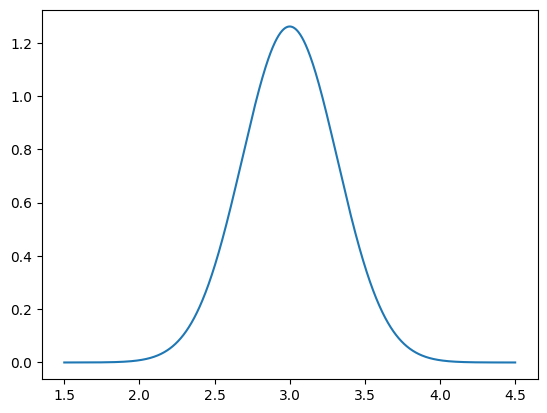

In [228]:
plot_pdf_1D(b(x=specific), 1.5, 4.5)

In [232]:
b(x = specific) 

AttributeError: 'Gaussian' object has no attribute 'noise'

In [213]:
S@x

CUQI LinearModel: _DefaultGeometry1D(2,) -> _DefaultGeometry1D(1,).
    Forward parameters: ['x'].

In [214]:
S@x@e

ValueError: Attempting to match parameter name of Model with given distribution, but distribution dimension does not match model domain dimension.

## Plot functions 
- are very confusing 
- make it more efficient 
- UserDistribution more abt this 

In [262]:
likelihood = b(b=b(x=specific).sample())
print(likelihood)

CUQI Gaussian Likelihood function. Parameters ['x'].


In [263]:
try:
    likelihood.pdf(x=specific)
except Exception as e:
    print(e)

'Likelihood' object has no attribute 'pdf'


In [264]:
x.pdf(specific)

array([0.02588303])

In [265]:
likelihood.logd(x=specific)

CUQIarray: NumPy array wrapped with geometry.
---------------------------------------------

Geometry:
 _DefaultGeometry1D(1,)

Parameters:
 True

Array:
CUQIarray([-0.44709173])

C:\Users\Ich\AppData\Local\Temp\ipykernel_1968\1366380294.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distb_pdf[ii,jj] = np.exp(distb.logd([grid1[ii,jj], grid2[ii,jj]]))


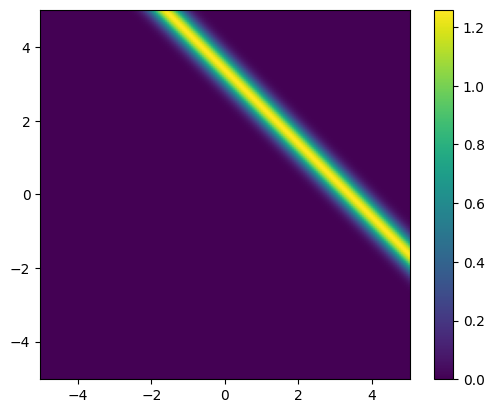

In [266]:
x1_lim = np.array([-5, 5])
x2_lim = np.array([-5, 5])
plot_pdf_2D(
    likelihood,
    x1_min=x1_lim[0], x1_max=x1_lim[1],
    x2_min=x2_lim[0], x2_max=x2_lim[1])

C:\Users\Ich\AppData\Local\Temp\ipykernel_1968\1366380294.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distb_pdf[ii,jj] = np.exp(distb.logd([grid1[ii,jj], grid2[ii,jj]]))


(-5.0, 5.0)

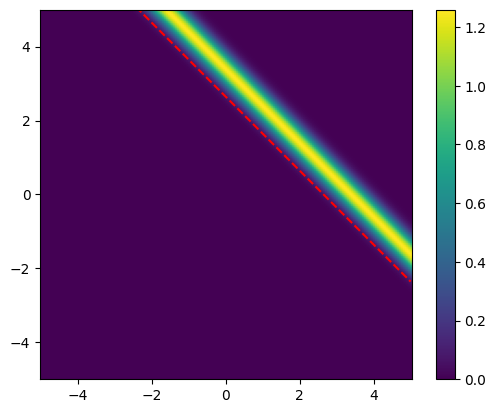

In [268]:
# Plot the likelihood
plot_pdf_2D(
    likelihood,
    x1_min=x1_lim[0], x1_max=x1_lim[1],
    x2_min=x2_lim[0], x2_max=x2_lim[1])

# Plot the line x2 = b_obs - x1
plt.plot(x1_lim, b(x=specific).sample()-x1_lim, '--r')
plt.ylim(x2_lim)